In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xarray as xr
import datetime

In [2]:
mjd_unixtimestamp_offset = 10587.5
seconds_in_day = 3600 * 24
c = 299792458

def mjd2unixtimestamp(m):
    return (m - mjd_unixtimestamp_offset) * seconds_in_day

def load_gmat_report(path):
    GMAT_COLS = 7
    data = np.fromfile(path, sep=' ').reshape((-1, GMAT_COLS))
    t = [np.datetime64(datetime.datetime.utcfromtimestamp(s)) for s in mjd2unixtimestamp(data[:,0])]
    xr_data = xr.DataArray(data[:,1:].reshape((-1, 2 ,3)), dims = ('time', 'rv', 'xyz'),\
                           coords = {'time' : t, 'rv' : ['r', 'v'], 'xyz' : ['x', 'y', 'z']})
    return xr_data

def doppler_ppb(data):
    return -1e12 / c * ((data.sel(rv = 'r') * data.sel(rv = 'v')).sum('xyz') / np.sqrt((data.sel(rv = 'r')**2).sum('xyz'))).drop('rv')

In [3]:
ecef = load_gmat_report('ecef_report.txt')
ea4gpz = load_gmat_report('ea4gpz_report.txt')

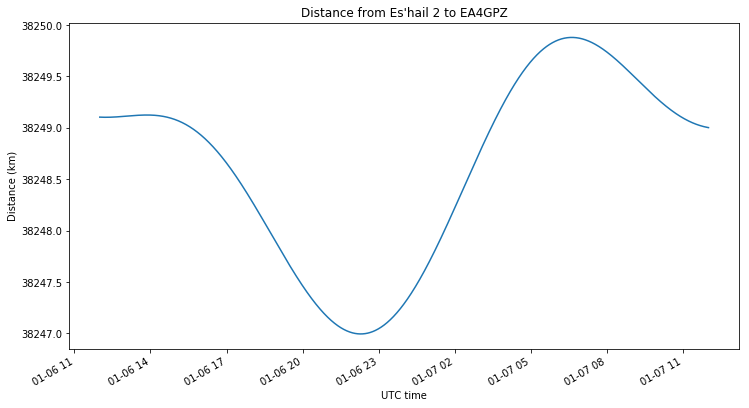

In [4]:
plt.figure(figsize = (12,6), facecolor = 'w')
np.sqrt((ea4gpz.sel(rv = 'r')**2).sum('xyz')).plot()
plt.ylabel('Distance (km)')
plt.xlabel('UTC time')
plt.title('Distance from Es\'hail 2 to EA4GPZ');

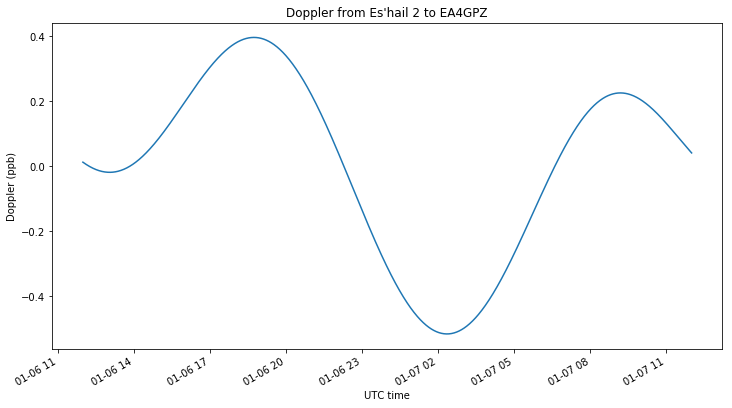

In [5]:
plt.figure(figsize = (12,6), facecolor = 'w')
doppler_ppb(ea4gpz).plot()
plt.ylabel('Doppler (ppb)')
plt.xlabel('UTC time')
plt.title('Doppler from Es\'hail 2 to EA4GPZ');

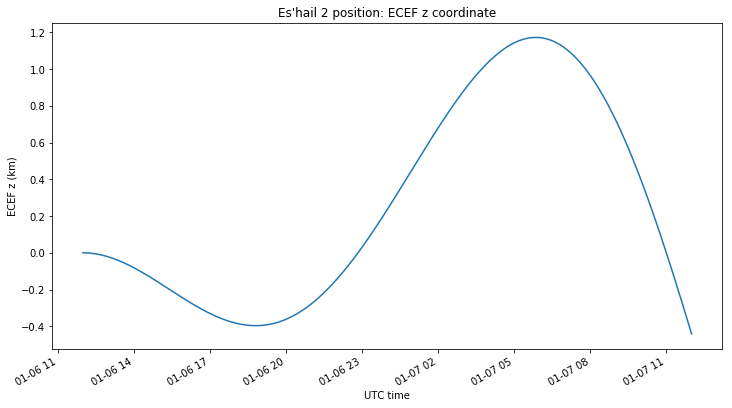

In [6]:
plt.figure(figsize = (12,6), facecolor = 'w')
ecef.sel(rv = 'r', xyz = 'z').plot()
plt.ylabel('ECEF z (km)')
plt.xlabel('UTC time')
plt.title('Es\'hail 2 position: ECEF z coordinate');

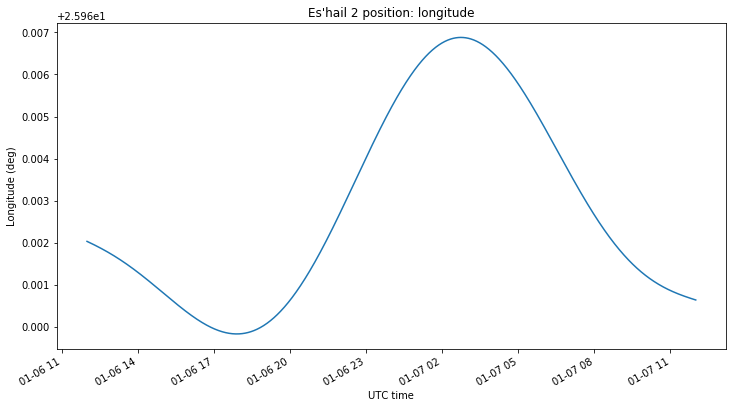

In [7]:
plt.figure(figsize = (12,6), facecolor = 'w')
np.rad2deg(np.arctan(ecef.sel(rv = 'r', xyz = 'y')/ecef.sel(rv = 'r', xyz = 'x'))).plot()
plt.ylabel('Longitude (deg)')
plt.xlabel('UTC time')
plt.title('Es\'hail 2 position: longitude');

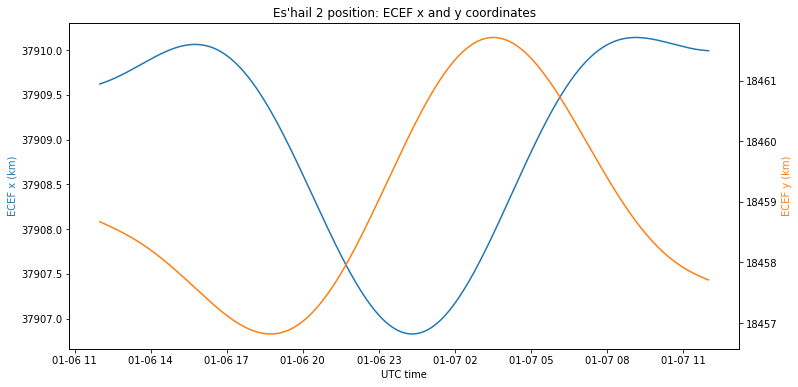

In [8]:
plt.figure(figsize = (12,6), facecolor = 'w')
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(ecef.coords['time'], ecef.sel(rv = 'r', xyz = 'x'), color = 'C0', label = 'ECEF x')
ax2.plot(ecef.coords['time'], ecef.sel(rv = 'r', xyz = 'y'), color = 'C1', label = 'ECEF y')
ax1.set_ylabel('ECEF x (km)', color = 'C0')
ax2.set_ylabel('ECEF y (km)', color = 'C1')
ax1.set_xlabel('UTC time')
plt.title('Es\'hail 2 position: ECEF x and y coordinates');

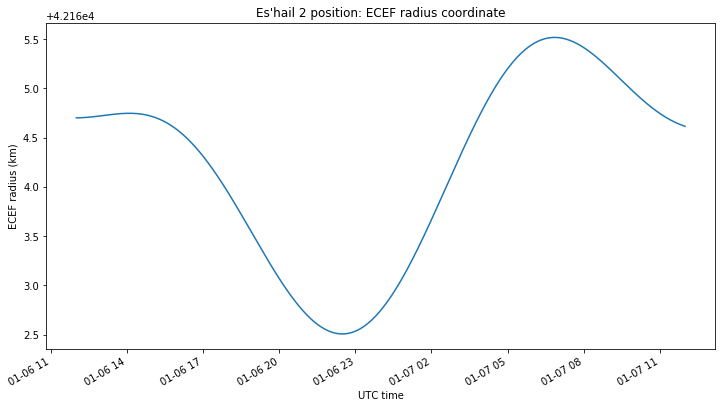

In [12]:
plt.figure(figsize = (12,6), facecolor = 'w')
np.sqrt((ecef.sel(rv = 'r')**2).sum('xyz')).plot()
plt.ylabel('ECEF radius (km)')
plt.xlabel('UTC time')
plt.title('Es\'hail 2 position: ECEF radius coordinate');